In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# Feature Normalization

def featureNormalize(x):
    x_norm = x
    mu = np.zeros((1, x.shape[1]))
    sigma = np.zeros((1, x.shape[1]))
    
    for i in range(x.shape[1]):
        mu[0, i] = np.mean(x[:, i])
        sigma[0, i] = np.std(x[:, i])
    x_norm = (x_norm - mu) / sigma;
    
    return x_norm, mu, sigma

data = np.loadtxt('ex1data2.txt', delimiter = ',')
X_orig = data[:, 0:2]
y_orig = data[:, 2]
m = len(y_orig)

X_norm, mu, sigma = featureNormalize(X_orig)

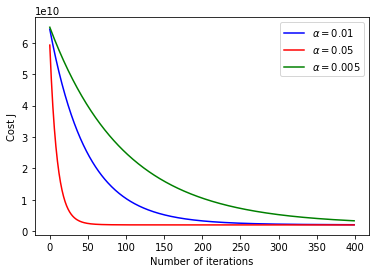

In [61]:
# Gredient descent

def computeCost(x, y, theta):
    m = len(y)
    J = np.sum(np.square(np.dot(x, theta) - y)) / (2 * m)
    
    return J

def gradientDescent(x, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    
    for iter in range(num_iters):
        theta = theta - alpha * np.dot(x.T, (np.dot(x, theta) - y)) / m
        J_history.append(computeCost(x, y, theta))
        
    return theta, J_history

X = np.c_[np.ones((m, 1)), X_norm]
y = y_orig.reshape(m,1)

alpha = 0.01
num_iters = 400;
theta = np.zeros((3, 1))

theta_new, J_history = gradientDescent(X, y, theta, alpha, num_iters)
plt.plot(range(len(J_history)), J_history, c = 'b', label = r'$\alpha=0.01$');
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

alpha_1 = 0.05
theta_new_1, J_history_1 = gradientDescent(X, y, theta, alpha_1, num_iters)
plt.plot(range(len(J_history_1)), J_history_1, c = 'r', label = r'$\alpha=0.05$');

alpha_2 = 0.005
theta_new_2, J_history_2 = gradientDescent(X, y, theta, alpha_2, num_iters)
plt.plot(range(len(J_history_2)), J_history_2, c = 'g', label = r'$\alpha=0.005$');
plt.legend()

In [66]:
# Predict

price = np.dot([1,(1650 - mu[0,0]) / sigma[0,0],(3 - mu[0,1]) / sigma[0,1]], theta_new)
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n $%f\n' %price);

Predicted price of a 1650 sq-ft, 3 br house(using gradient descent):
 $289221.547371



In [64]:
# Normal Equation

X = np.c_[np.ones((m, 1)), X_orig]
y = y_orig.reshape(m,1)

theta = np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T), y)
print('Theta computed from the normal equations: \n')
print(theta)

Theta computed from the normal equations: 

[[89597.90954355]
 [  139.21067402]
 [-8738.01911255]]


In [67]:
# Predict

price = np.dot([1,1650,3],theta);
print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations):\n $%f' %price);


Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $293081.464335
